 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
import statistics

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
#whale_returns = pd.read_csv('whale_returns.csv')
whale_returns_csv = Path("whale_returns.csv")
whale_returns = pd.read_csv(
    whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns = whale_returns.sort_index()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Reading whale returns
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [4]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns.dropna()
whale_returns = whale_returns.dropna().copy()
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [6]:
# Reading algorithmic returns
#algo_returns = pd.read_csv('algo_returns.csv')
algo_returns_csv = Path("algo_returns.csv")
algo_returns = pd.read_csv(
    algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns = algo_returns.sort_index()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_returns = algo_returns.dropna().copy()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P TSX 60 Closing Prices
##sp_returns = pd.read_csv('sp_tsx_history.csv')
sp_returns= Path('sp_tsx_history.csv')
sp_returns = pd.read_csv('sp_tsx_history.csv',index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_returns= sp_returns.sort_index()
sp_returns.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [10]:
# Check Data Types
sp_returns.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp_returns['Close'] = sp_returns['Close'].str.replace("$", "")
sp_returns['Close'] = sp_returns['Close'].str.replace(",", "")
sp_returns['Close'] = sp_returns['Close'].astype("float")

/var/folders/6d/1wdry0bx6yjbbzpvx1x1txyh0000gn/T/ipykernel_14922/2194154780.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_returns['Close'] = sp_returns['Close'].str.replace("$", "")


In [12]:
# Calculate Daily Returns
sp_daily = sp_returns.pct_change()
sp_daily.head()



##prices = sp_returns()
#daily_return = prices.pct_change(1) # 1 for ONE DAY lookback
##monthly_return = prices.pct_change(21) # 21 for ONE MONTH lookback
#annual_return = prices.pct_change(252) # 252 for 

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [13]:
# Drop nulls
sp_returns = sp_returns.dropna().copy()
sp_returns.head()


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp_returns.rename(columns = {'Close':'S&P TSX 60 Returns'}, inplace = True)
sp_returns

,S&P TSX 60 Returns
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
all_returns = pd.concat([whale_returns,algo_returns,sp_returns],axis='columns',join="inner")
all_returns.head()
#all_returns.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60 Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,15133.85
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,15082.84
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,15103.11
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,14952.50
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,14854.49


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

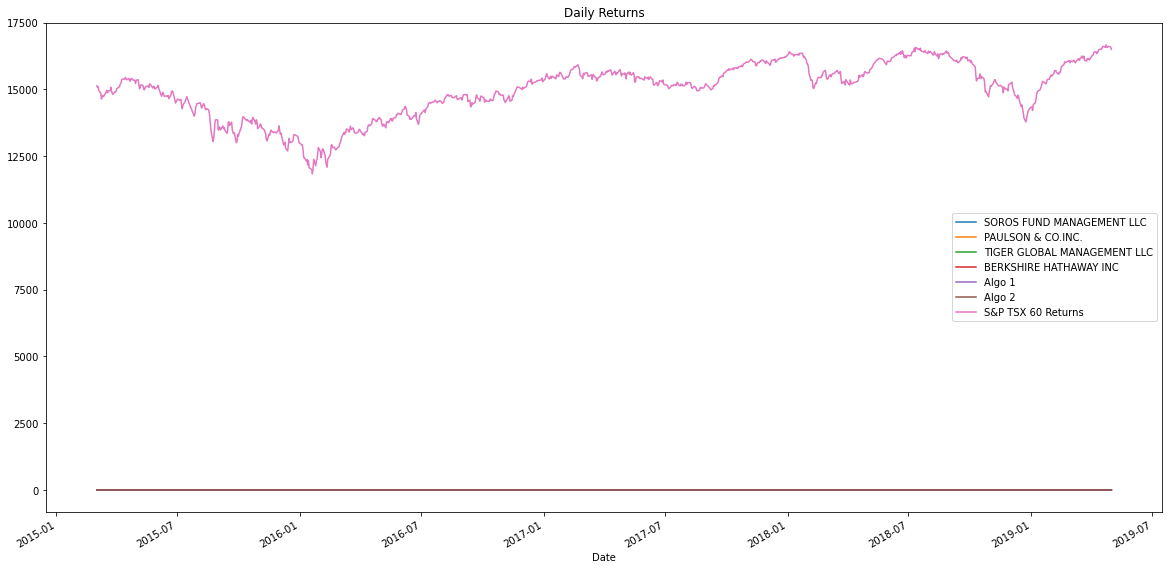

In [16]:
# Plot daily returns of all portfolios
all_returns.plot(figsize=(20, 10), title="Daily Returns")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

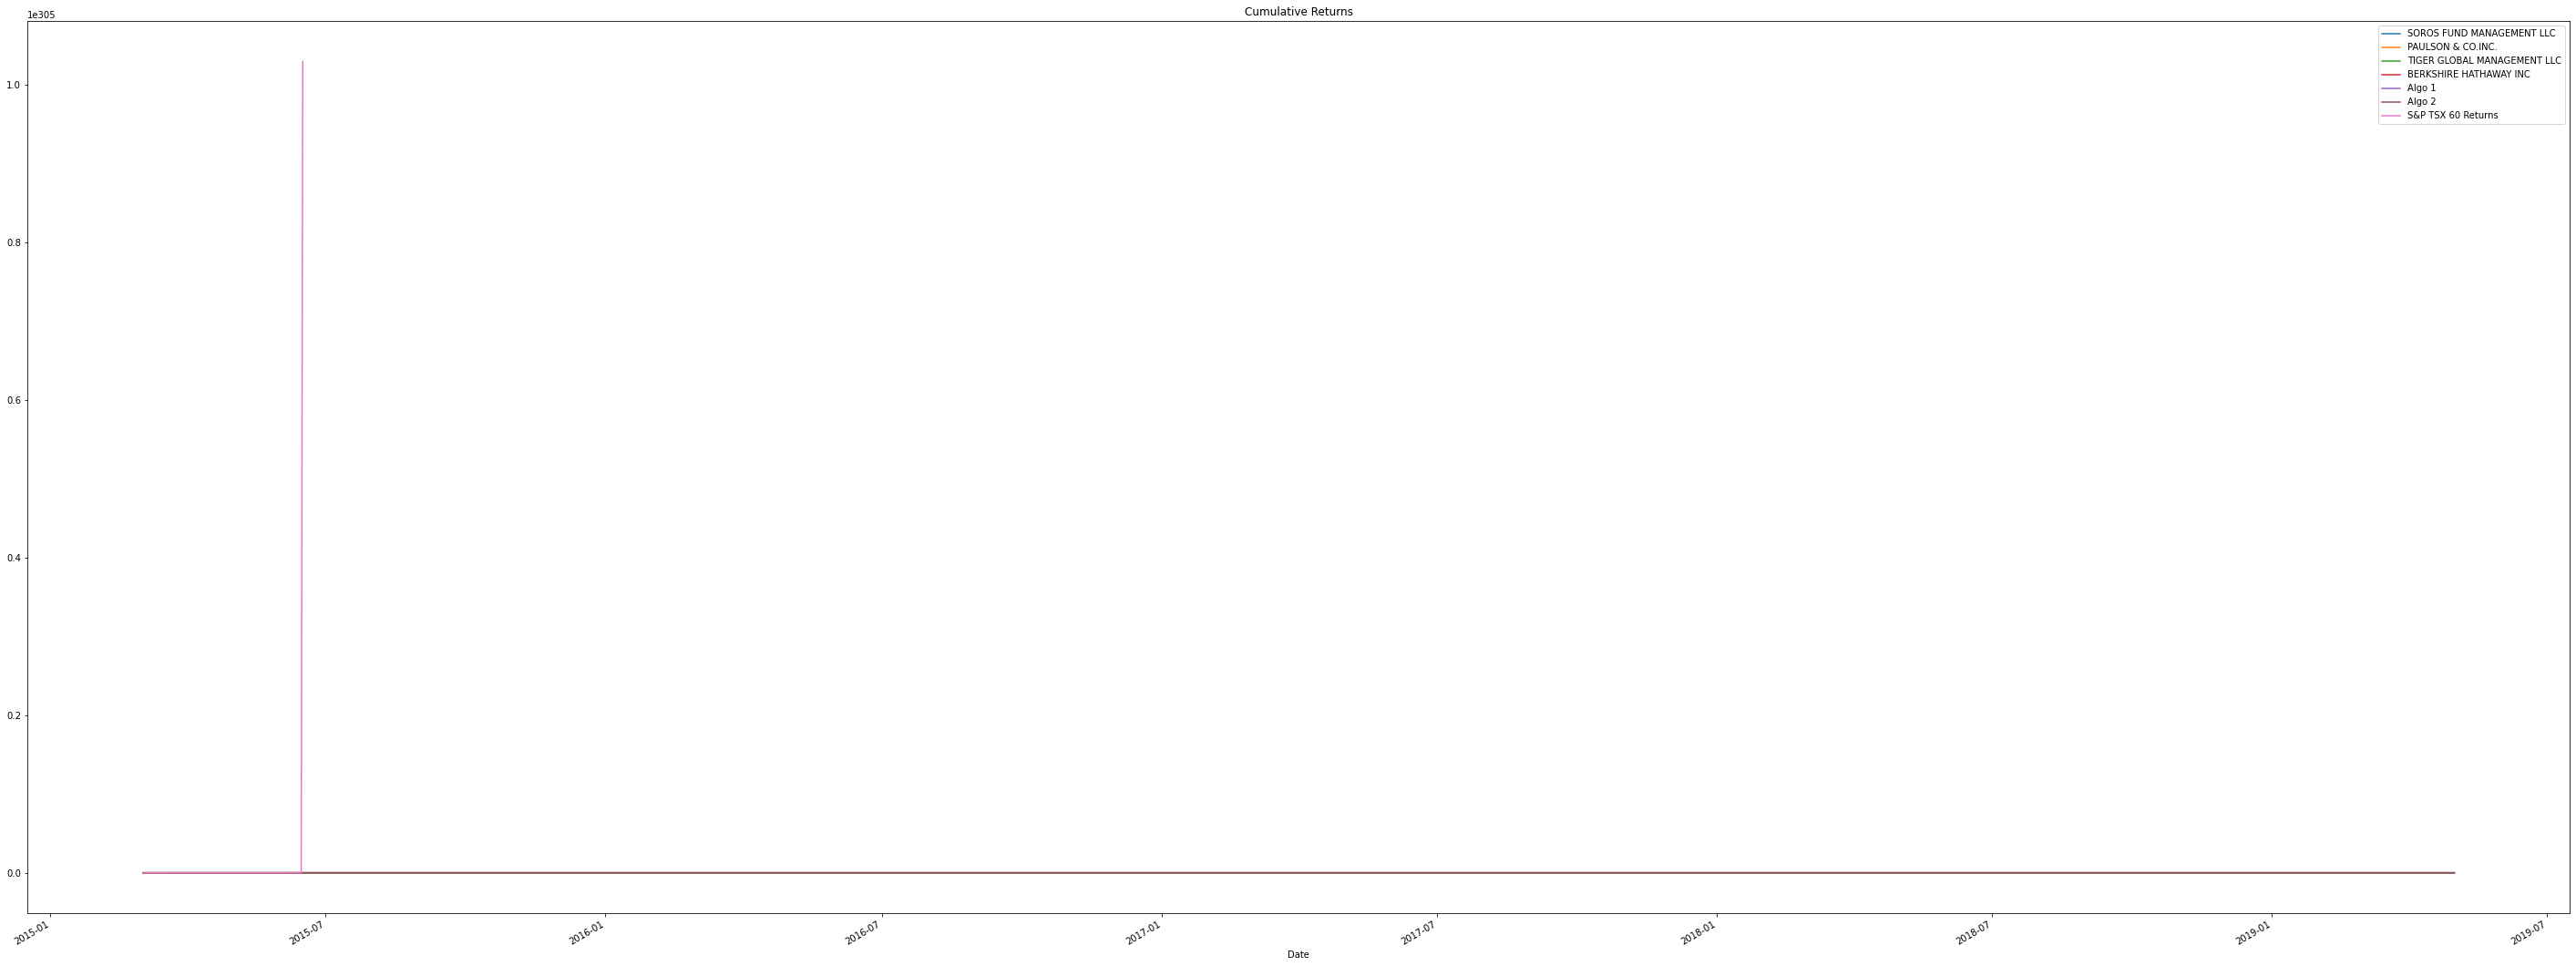

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_returns).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(50, 20), title="Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


{'whiskers': [<matplotlib.lines.Line2D at 0x7f9ab19f5580>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9ab19f5b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9ab19f52b0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9ab1a04100>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9ab1a043d0>,
 'means': []}

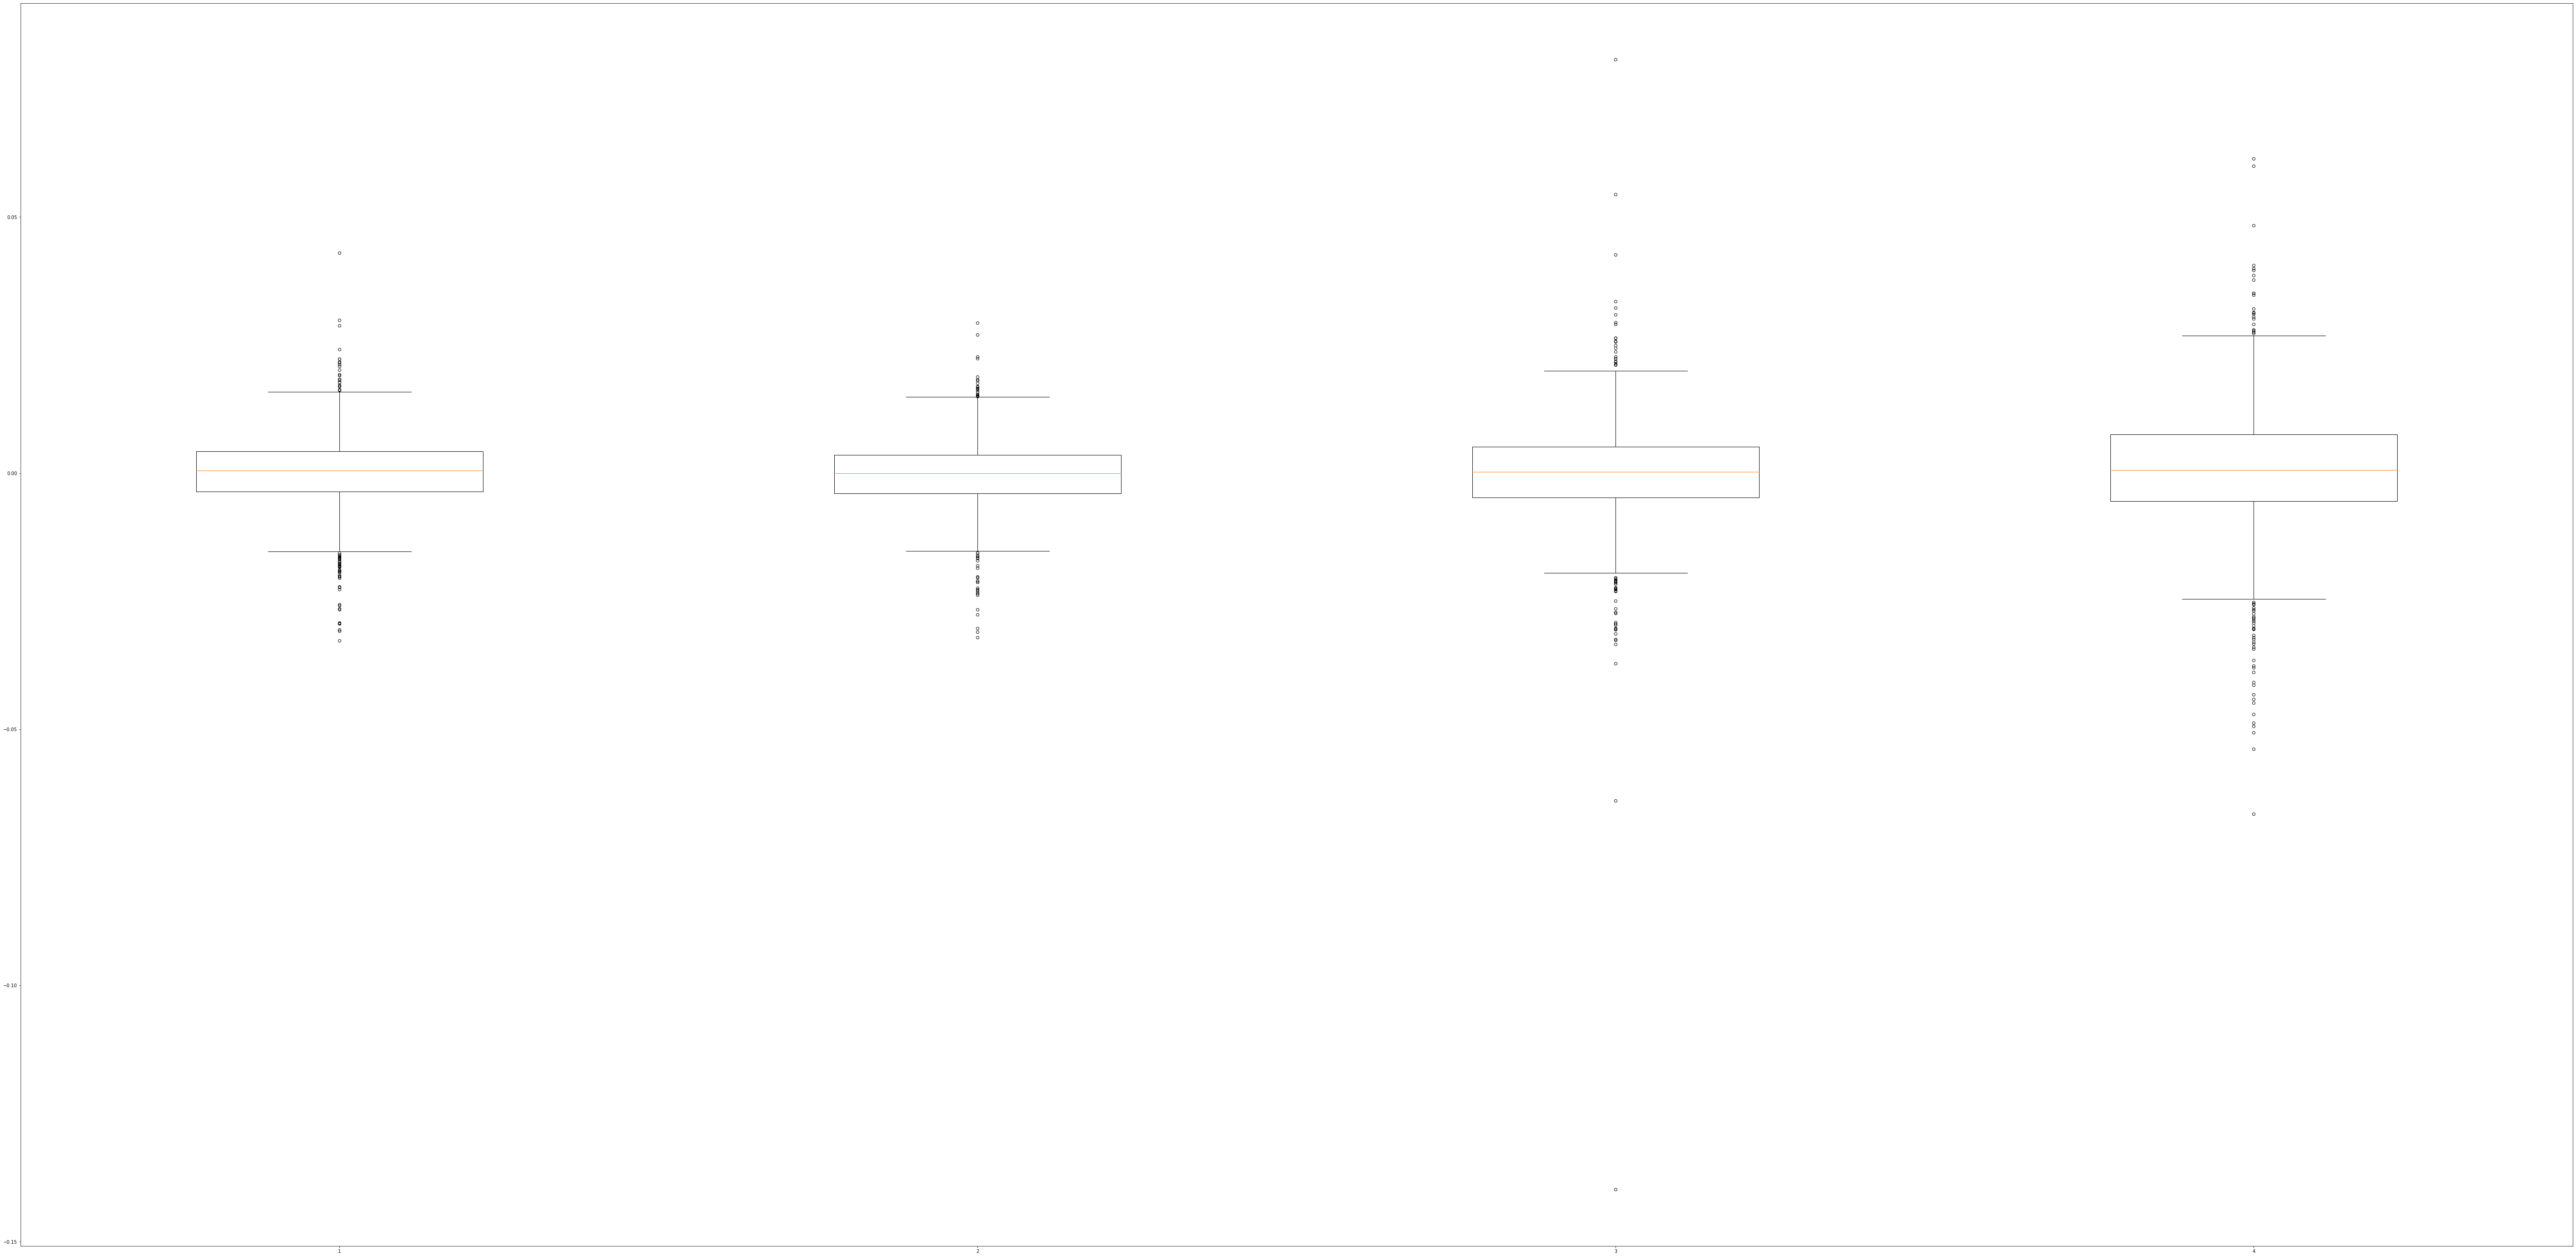

In [18]:
# Box plot to visually show risk
fig = plt.figure(figsize =(100, 50),)
plt.boxplot(whale_returns)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9abd93ab50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9abd94a130>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9abd93a880>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9abd94a6d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9abd94a9a0>,
 'means': []}

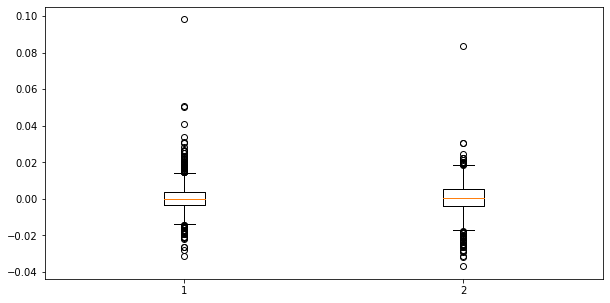

In [19]:
# Box plot to visually show risk
fig = plt.figure(figsize =(10, 5))
plt.boxplot(algo_returns)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9abdc21310>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9abdc218b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9abdc21040>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9abdc21e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9abdc2d160>],
 'means': []}

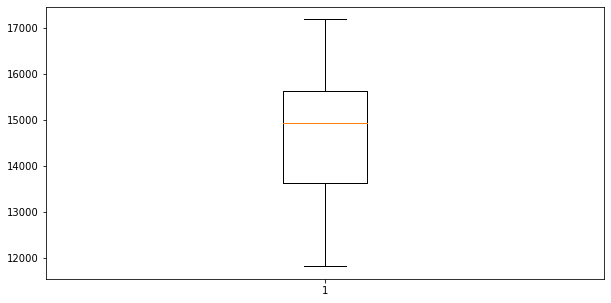

In [20]:
# Box plot to visually show risk
fig = plt.figure(figsize =(10, 5))
plt.boxplot(sp_returns)

### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios
all_returns.std()


##statistics.stdev(whale_returns)
#statistics.stdev(algo_returns)

SOROS FUND MANAGEMENT LLC         0.007828
PAULSON & CO.INC.                 0.006982
TIGER GLOBAL MANAGEMENT LLC       0.010883
BERKSHIRE HATHAWAY INC            0.012826
Algo 1                            0.007589
Algo 2                            0.008326
S&P TSX 60 Returns             1016.677139
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [22]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_risk = all_returns['S&P TSX 60 Returns'].std()

# Determine which portfolios are riskier than the S&P TSX 60
all_returns.std()>sp_risk

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC    False
BERKSHIRE HATHAWAY INC         False
Algo 1                         False
Algo 2                         False
S&P TSX 60 Returns             False
dtype: bool

### Calculate the Annualized Standard Deviation

In [23]:
# Calculate the annualized standard deviation (252 trading days)
annual_sd = all_returns.std()*np.sqrt(252)
annual_sd

SOROS FUND MANAGEMENT LLC          0.124259
PAULSON & CO.INC.                  0.110841
TIGER GLOBAL MANAGEMENT LLC        0.172759
BERKSHIRE HATHAWAY INC             0.203599
Algo 1                             0.120470
Algo 2                             0.132177
S&P TSX 60 Returns             16139.249245
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling STD For All Portfolios'}, xlabel='Date'>

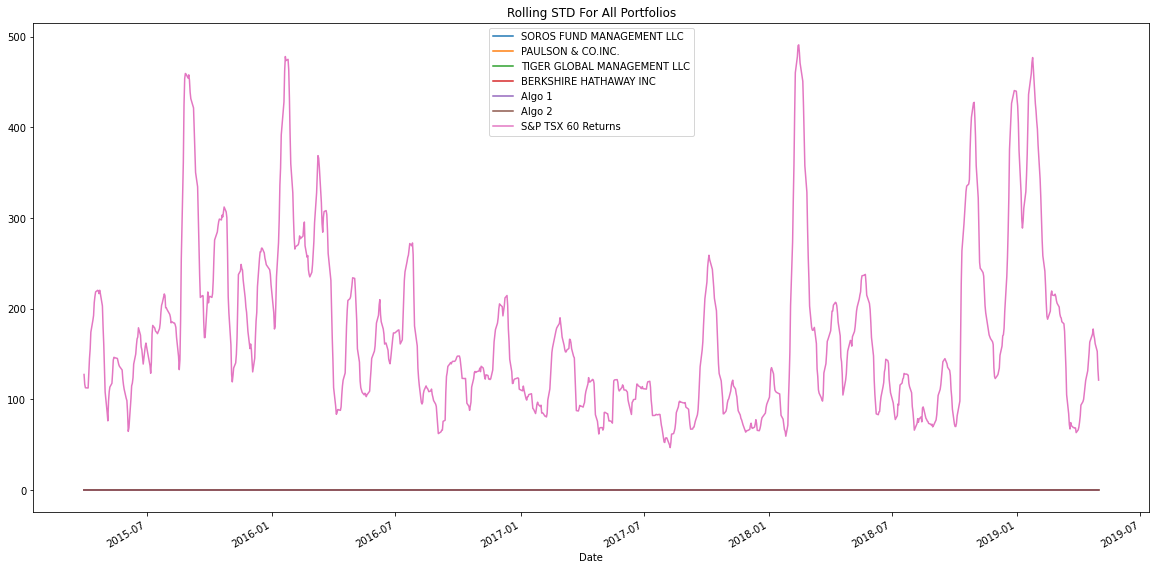

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_returns_rolling_sd=all_returns.rolling(window=21).std()
# Plot the rolling standard deviation
all_returns_rolling_sd.plot(figsize=(20,10),title='Rolling STD For All Portfolios')
## Code is correct. Plot only showing S&P Portfolio.


### Calculate and plot the correlation

In [25]:
# Calculate the correlation
cor_df=all_returns.corr()

# Display de correlation matrix
cor_df.style.background_gradient(cmap='summer')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60 Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.065582
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.057284
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,-0.012292
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.067720
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,-0.054593
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.076330
S&P TSX 60 Returns,0.065582,0.057284,-0.012292,0.067720,-0.054593,0.076330,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'BERKSHIRE HATHAWAY Beta'}, xlabel='Date'>

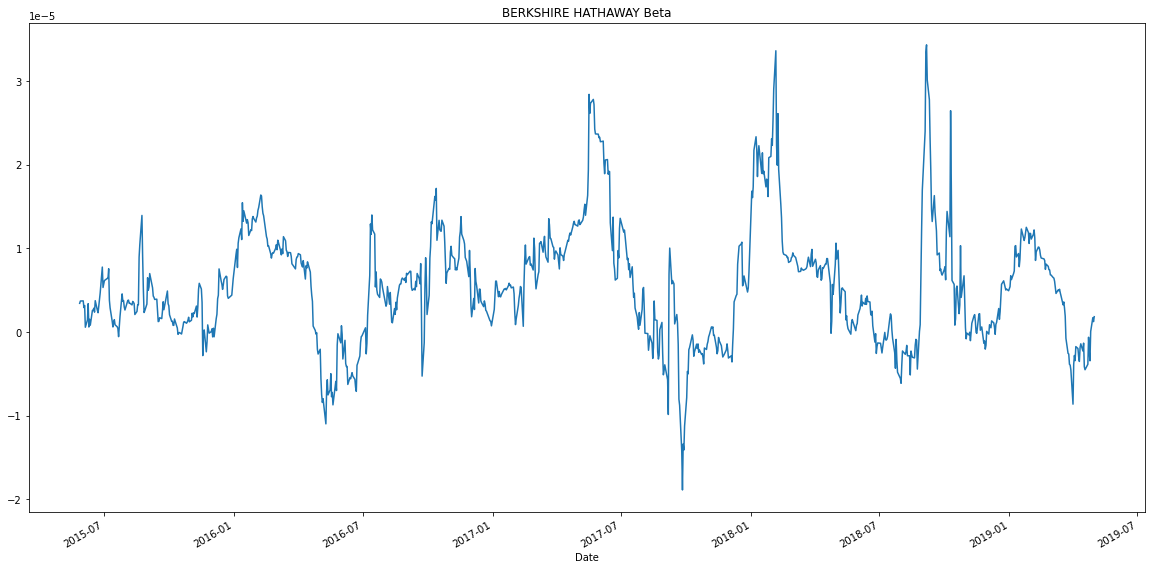

In [26]:
# Calculate covariance of a single portfolio
co_variance = all_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(all_returns['S&P TSX 60 Returns'])
# Calculate variance of S&P TSX
variance = all_returns['S&P TSX 60 Returns'].rolling(60).var()
# Computing beta
beta=co_variance/variance
# Plot beta trend
beta.plot(figsize=(20,10), title='BERKSHIRE HATHAWAY Beta')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'Exponentially Weighted Average'}, xlabel='Date'>

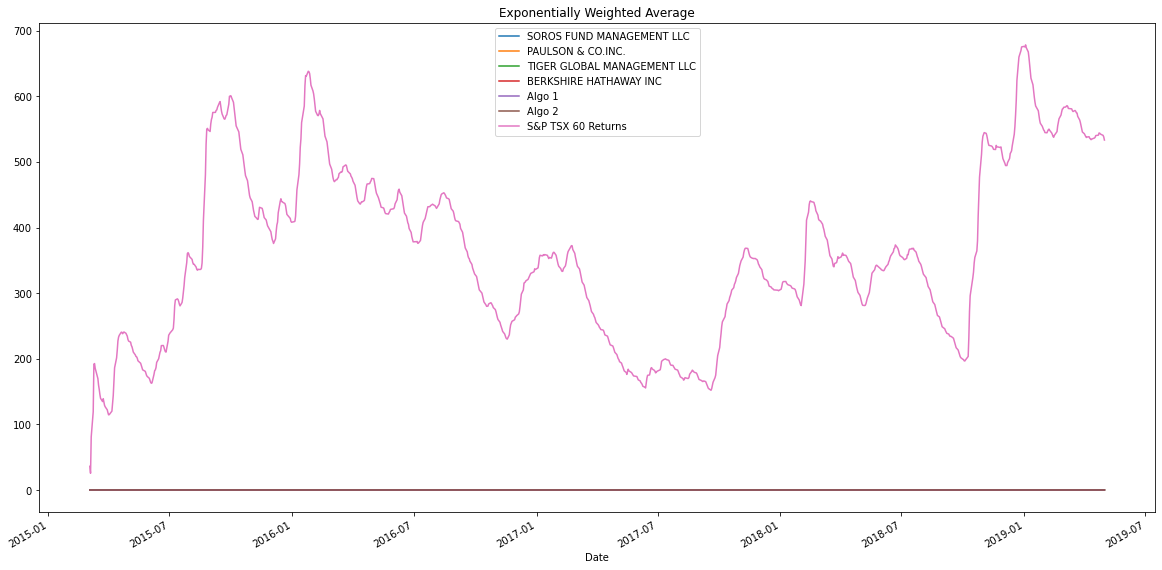

In [27]:
# Use `ewm` to calculate the rolling window
all_returns.ewm(halflife=21).std().plot(figsize=(20,10),title='Exponentially Weighted Average')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [28]:
# Annualized Sharpe Ratios
sharpe_ratios=(all_returns.mean()*252)/(all_returns.std()*np.sqrt(252))

<AxesSubplot:title={'center':'Sharpe Ratios Bar Plot'}>

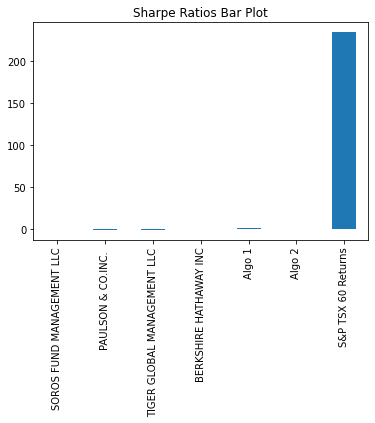

In [29]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar',title='Sharpe Ratios Bar Plot')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [30]:
# Reading data from 1st stock
shop_returns_csv = Path("shop_historical.csv")
shop_returns = pd.read_csv(
    shop_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
shop_returns = shop_returns.sort_index()
shop_returns.head()

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [31]:
# Reading data from 2nd stock
otex_returns_csv = Path("otex_historical.csv")
otex_returns = pd.read_csv(
    otex_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
otex_returns =otex_returns.sort_index()
otex_returns.head()

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [32]:
# Reading data from 3rd stock
i_returns_csv = Path("l_historical.csv")
i_returns = pd.read_csv(
  i_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
i_returns = i_returns.sort_index()
i_returns.head()

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [38]:
# Combine all stocks in a single DataFrame
stocks_returns = pd.concat([shop_returns,otex_returns,i_returns],axis='rows',join="inner")
stocks_returns.head()
#r

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [39]:
# Reset Date index
stocks_returns = stocks_returns.reset_index()
stocks_returns.head()

,Date,Symbol,Close
0,2018-01-02,SHOP,132.06
1,2018-01-03,SHOP,135.15
2,2018-01-04,SHOP,137.46
3,2018-01-05,SHOP,137.26
4,2018-01-08,SHOP,139.51


In [40]:
# Reorganize portfolio data by having a column per symbol
all_stocks_returns=stocks_returns.pivot_table(values="Close", index="Date", columns="Symbol")
#all_stocks_returns = stocks_returns.pivot(columns='Symbol',values='OTEX')
stocks_returns.head()

,Date,Symbol,Close
0,2018-01-02,SHOP,132.06
1,2018-01-03,SHOP,135.15
2,2018-01-04,SHOP,137.46
3,2018-01-05,SHOP,137.26
4,2018-01-08,SHOP,139.51


In [41]:
# Calculate daily returns
stocks_daily = stocks_returns.pct_change()
#stocks_daily.head()
# Drop NAs
all_stocks_returns.dropna(inplace = True)
#all_stocks_returns = stocks_returns.dropna().copy()
#all_stocks_returns.isnull().sum()
# Display sample data
all_stocks_returns

TypeError: unsupported operand type(s) for /: 'str' and 'str'

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio returna
# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame
combined_returns = pd.concat([whale_returns,algo_returns,sp_returns,stocks_returns],axis='columns',join="outer")
combined_returns.head()

In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!